
# Project: Investigate a Dataset - TMDB Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


The TMDB movie data set, contains information about 10,000 movies collected from The Movie Database (TMDb)  
This database contains the following features:-

**id** - A unique identifier for each movie.  
**imdb_id** - A unique identifier for each movie on IMDB.  
**popularity** - A numeric quantity specifying the movie popularity.  
**budget** - The budget in which the movie was made.  
**revenue** - The worldwide revenue generated by the movie.  
**original_title** - The title of the movie before translation or adaptation.  
**cast** - The name of lead and supporting actors.  
**homepage** - A link to the homepage of the movie.  
**director** - the director of the movie  
**tagline** - Movie's tagline.  
**keywords** - The keywords or tags related to the movie.  
**overview** - A brief description of the movie.  
**runtime** - The running time of the movie in minutes.  
**genres** - The genre of the movie.  
**production_companies** - The production companies of the movie.  
**release_date** - The date on which it was released.  
**vote_count** - The number of votes the film received.  
**vote_average** - average ratings the movie recieved.  
**popularity** - A numeric quantity specifying the movie popularity.  
**release_year** - The year in which the movie was released.  
**budget_adj** - shows the adjusted budget associated movie in terms of 2010 dollars.  
**revenue_adj** - shows the adjusted revenue associated movie in terms of 2010 dollars.  

# Questions for Analysis
 # What kind of properties are associated with popularity?
 # What are the yearly trends?

In [41]:
#import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling


In [42]:
# Load the data and print out a few lines
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [43]:
#return the dimensions of the df
df.shape

(10866, 21)

In [44]:
#useful stats on each column
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [45]:
#looking at the highest popularity scores
df.sort_values(by=['popularity']).tail(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
630,118340,tt2015381,14.311205,170000000,773312399,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,http://marvel.com/guardians,James Gunn,All heroes start somewhere.,...,"Light years from Earth, 26 years after being a...",121,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,7/30/14,5612,7.9,2014,1.565855e+08,7.122911e+08
629,157336,tt0816692,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,http://www.interstellarmovie.net/,Christopher Nolan,Mankind was born on Earth. It was never meant ...,...,Interstellar chronicles the adventures of a gr...,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,11/5/14,6498,8.0,2014,1.519800e+08,5.726906e+08
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [46]:
#summary of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


### Data Cleaning
    
There may be duplicates, so those will first be removed.   
There are no null-values for any of the numerical variables so averages do not need to be added to the numerical columns.   
There are a few null values in some rows, which will be something to watch out for.   
Some of the data types are incorrect so those will be changed.  
Some of the int variables are 64 bit and can be reduced due to the small range of the values in some columns.  


In [47]:
#checking to see if there are duplicates
sum(df.duplicated())

1

In [48]:
#drop the duplicates and check if they have gone
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [49]:
#remove unneeded columns
df.drop(['imdb_id', 'tagline', 'homepage', 'id', 'overview', 'production_companies', 'cast'], axis=1, inplace=True)

In [50]:
#change the date string to date type
df['release_date'] = pd.to_datetime(df['release_date'])

In [51]:
#find bit size limits
np.iinfo(np.int16)

iinfo(min=-32768, max=32767, dtype=int16)

In [52]:
#find the value counts of vote_count to see if the size should be reduced
df.vote_count.value_counts()

10      501
11      474
12      422
13      377
14      323
       ... 
891       1
970       1
369       1
1373      1
786       1
Name: vote_count, Length: 1289, dtype: int64

In [53]:
#reducing bit size
df["vote_count"] = df["vote_count"].astype("int16")
df["release_year"] = df["release_year"].astype("int16")

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10865 non-null  float64       
 1   budget          10865 non-null  int64         
 2   revenue         10865 non-null  int64         
 3   original_title  10865 non-null  object        
 4   director        10821 non-null  object        
 5   keywords        9372 non-null   object        
 6   runtime         10865 non-null  int64         
 7   genres          10842 non-null  object        
 8   release_date    10865 non-null  datetime64[ns]
 9   vote_count      10865 non-null  int16         
 10  vote_average    10865 non-null  float64       
 11  release_year    10865 non-null  int16         
 12  budget_adj      10865 non-null  float64       
 13  revenue_adj     10865 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int16(2), int64(3), 

In [55]:
#Count the number of genres. The genres are separated by | in the genres column.
#expand=True expands out the split elements into separate columns 
#.stack().value_counts() returns a series with the values as the index and 
#gives the count.
genre_count = df['genres'].str.split('|', expand =True).stack().value_counts().reset_index()
genre_count.columns = ['genre', 'count']
genre_count

,genre,count
0,Drama,4760
1,Comedy,3793
2,Thriller,2907
3,Action,2384
4,Romance,1712
5,Horror,1637
6,Adventure,1471
7,Crime,1354
8,Family,1231
9,Science Fiction,1229


In [59]:
#separating the genres using split and adding to the df

genre_df = df['genres'].str.split('|', expand =True).rename(columns=lambda x : "genre_{}".format(x+1))
df = pd.concat([df,keyword_df,genre_df], axis=1)


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 
## What kind of properties are associated with popularity?

In [56]:
# Group by genres and aggregate the popularity values
genre_popularity = df.groupby('genres')['popularity'].sum().reset_index()
genre_popularity.set_index('genres', inplace=True)

# show the top 20 genres with the highest popularity
genre_pop = genre_popularity.sort_values(by='popularity', ascending=False).head(20)
genre_pop

,popularity
genres,
Comedy,375.247922
Drama,361.127929
Drama|Romance,161.440368
Comedy|Romance,159.129492
Comedy|Drama,134.092834
Horror|Thriller,128.083537
Comedy|Drama|Romance,125.524195
Horror,93.533052
Action|Thriller,88.709717


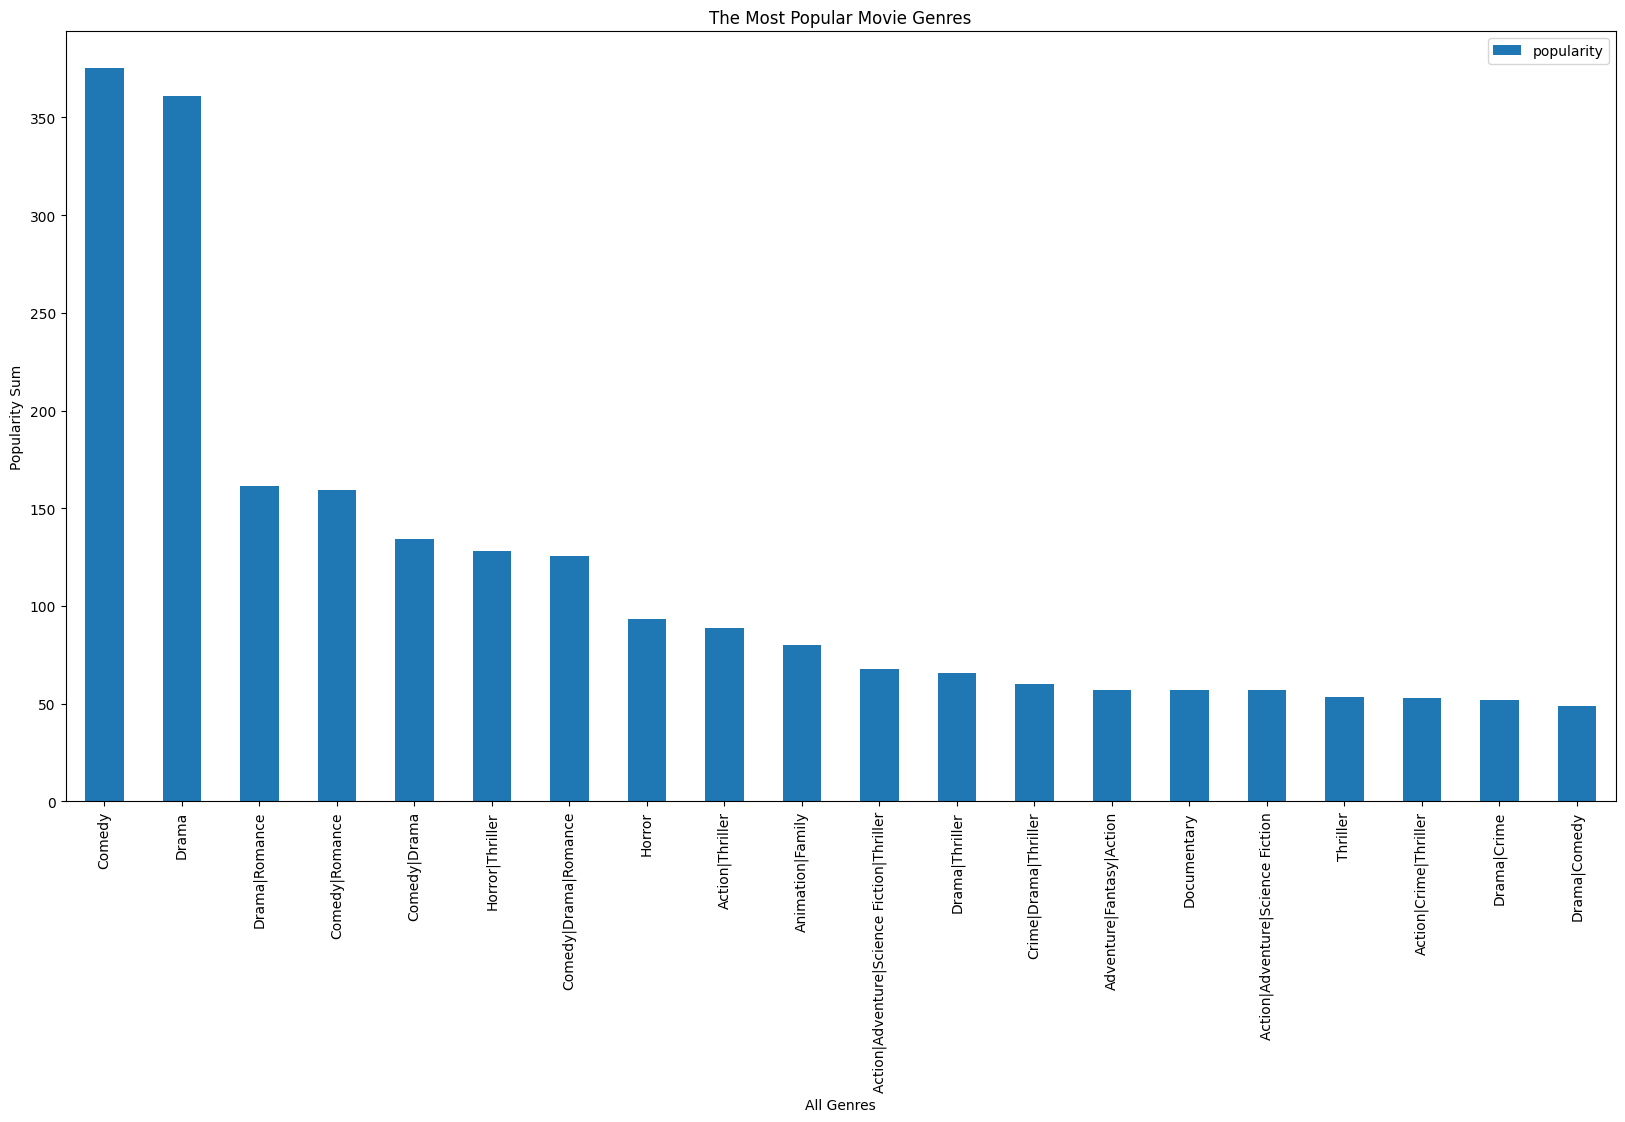

In [57]:
# Display the relationship between genre and popularity
genre_pop.plot(kind='bar', xlabel = 'All Genres', ylabel = 'Popularity Sum', title = 'The Most Popular Movie Genres', figsize=(20,10));

The graph above shows the genres and combination of genres and the popularities summed together for the movies in each group. It shows that Comedy and Drama have the highest popularity. Now I want use the split genres to look at them separately to see which genre is the most popular. 

In [60]:
#create a df with the genres and popularity
genre_data = df.loc[:,('genre_1','genre_2','genre_3','genre_4','genre_5', 'popularity')]

In [61]:
# Create an empty DataFrame to store the results
genre_popularity_df = pd.DataFrame(columns=['genre', 'popularity'])

# Loop through each movie and genre for that movie
for movie in range(genre_data.shape[0]):
    for category in range(genre_data.shape[1]-1):
            
        movie_genre = genre_data.iat[movie, category]
        popularity = genre_data.iat[movie, -1]

# Check if genre is not NaN or 'None'
        if pd.notna(movie_genre) and movie_genre != 'None':
            # Add a new row to the DataFrame for each genre
            genre_popularity_df = pd.concat([genre_popularity_df, pd.DataFrame({'genre': [movie_genre], 'popularity': [popularity]})], ignore_index=True)

# Group by genre and aggregate the popularity values
genre_popularity_df = genre_popularity_df.groupby('genre')['popularity'].sum().reset_index()
#make the genres the index
genre_popularity_df.set_index('genre', inplace=True)
#sort the df by popularity
genre_popularity_df = genre_popularity_df.sort_values(by='popularity', ascending=False)
# Display the genre popularity DataFrame
genre_popularity_df.head()

,popularity
genre,
Drama,2815.517715
Comedy,2247.759649
Action,2208.238255
Thriller,2155.723620
Adventure,1697.915054


The dataframe above shows that the popularity of Drama and Comedy films is the greatest, however, there may just be more of these films as I have just summed the popularity together. So next I want to normalise the data by doing popularity/the number of films for each genre.


In [62]:
#Merge genre_count with genre_popularity_df
#genre_count is defined in a cell above
genre_popularity_df = genre_popularity_df.merge(genre_count, on='genre', how='left')

# Normalise popularity by the number of movies for each genre
genre_popularity_df['normalised_popularity'] = genre_popularity_df['popularity'] / genre_popularity_df['count']

# Sort by normalized popularity in descending order
genre_popularity_df = genre_popularity_df.sort_values(by='normalised_popularity', ascending=False)

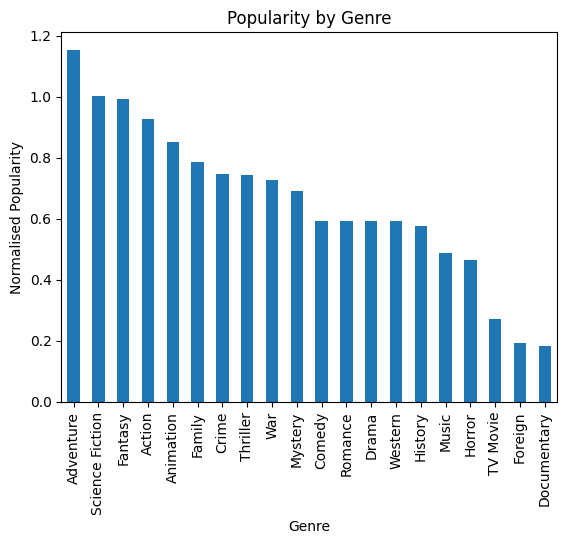

In [63]:
#make the genres the index
genre_popularity_df.set_index('genre', inplace=True)

#plot the genres by the normalised popularity
genre_popularity_df['normalised_popularity'].plot(kind='bar', xlabel='Genre', ylabel='Normalised Popularity', title='Popularity by Genre');

The most popular genre per movie made is Adventure!
Next, I want to see if the higher the budget or revenue, the greater the popularity. The budgets may be put towards marketing and hype creation which may affect the popularity of the film. If the revenue is greater, does that mean there was more interest in the film because it's popular? Let's have a look.

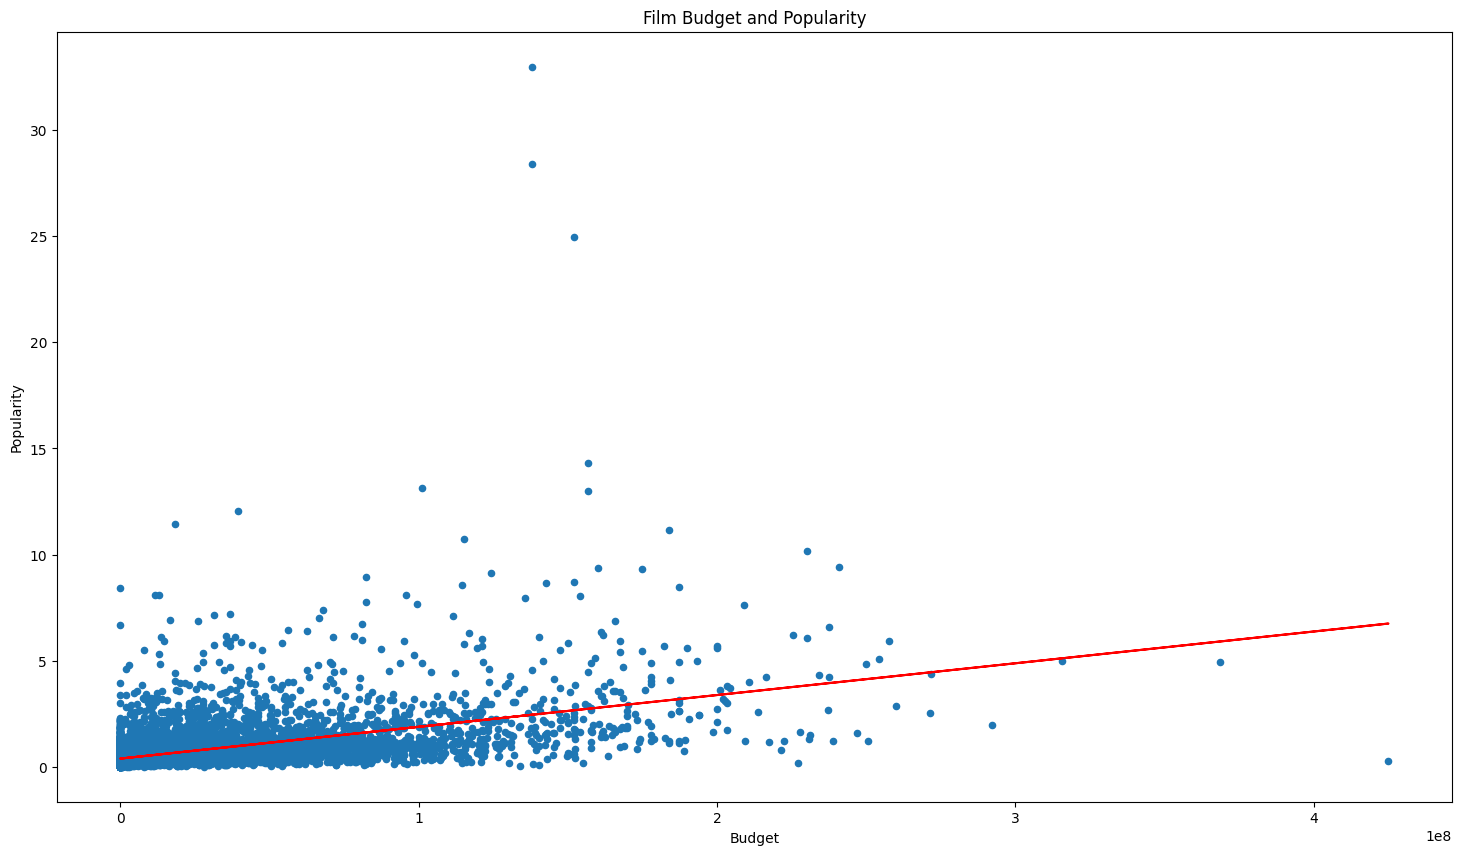

In [64]:
#create a function to plot a scatter graph with a regression line

def plot_scatter_with_trend(df, x_column, y_column, title, xlabel, ylabel):
    """
    Plot a scatter plot from a DataFrame column, with a title and axis labels.

    Parameters:
    df (pd.DataFrame): The pandas DataFrame containing the data.
    x_column (str): The x axis.
    y_column (str): The y axis.
    title (str): The title of the graph.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.
    
    """
    # Fit a linear regression model
    coefficients = np.polyfit(df[x_column], df[y_column], 1)
    polynomial = np.poly1d(coefficients)

    # Create scatter plot
    df.plot(x=x_column, y=y_column, kind='scatter', figsize=(18,10), title=title, xlabel=xlabel, ylabel=ylabel);

    # Plot the regression line
    plt.plot(df[x_column], polynomial(df[x_column]), color='red')

    plt.show()
    
#Use the function to plot a graph of budget vs popularity
plot_scatter_with_trend(df, 'budget_adj', 'popularity', 'Film Budget and Popularity', 'Budget', 'Popularity')

There are a few outliers in the graph above, with popularity greater than 15. So I will remove those values and also remove the movies with a budget of 0. 


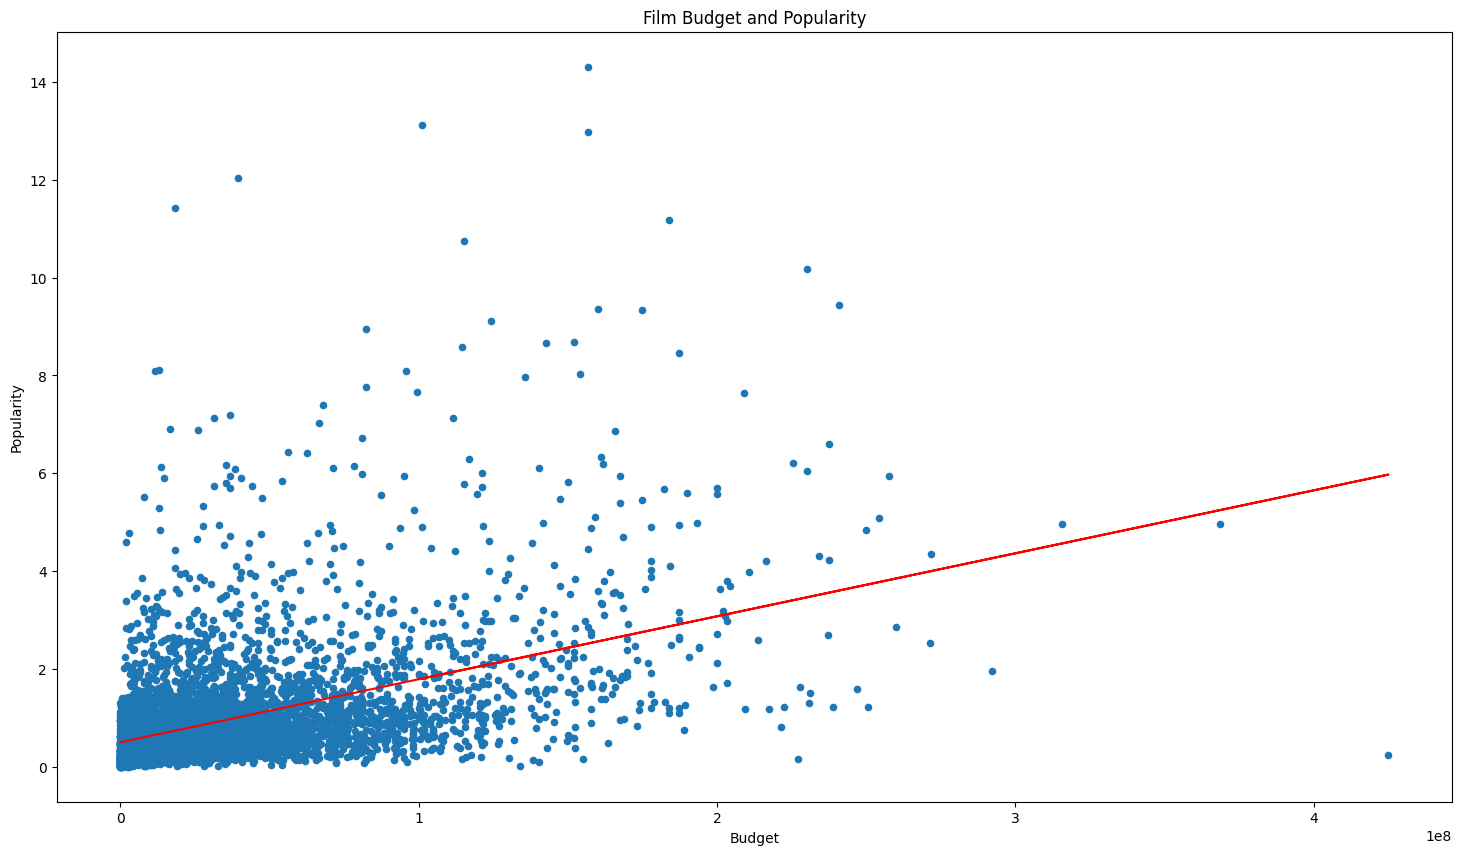

In [65]:
# Filter the DataFrame to exclude the upper outliers in 'popularity' and remove the 0 budget films
filtered_df = df[(df['popularity'] <= 15) & (df['budget_adj'] > 0)]

#Use function created above to create a graph with a regression line
plot_scatter_with_trend(filtered_df, 'budget_adj', 'popularity', 'Film Budget and Popularity', 'Budget', 'Popularity')

The trend line shows that there is a positive trend between movie budget and popularity. However, scatter about the line is very high, so the relationship between movie budget and popularity is weak. We cannot say the higher the budget, the greater the popularity. 

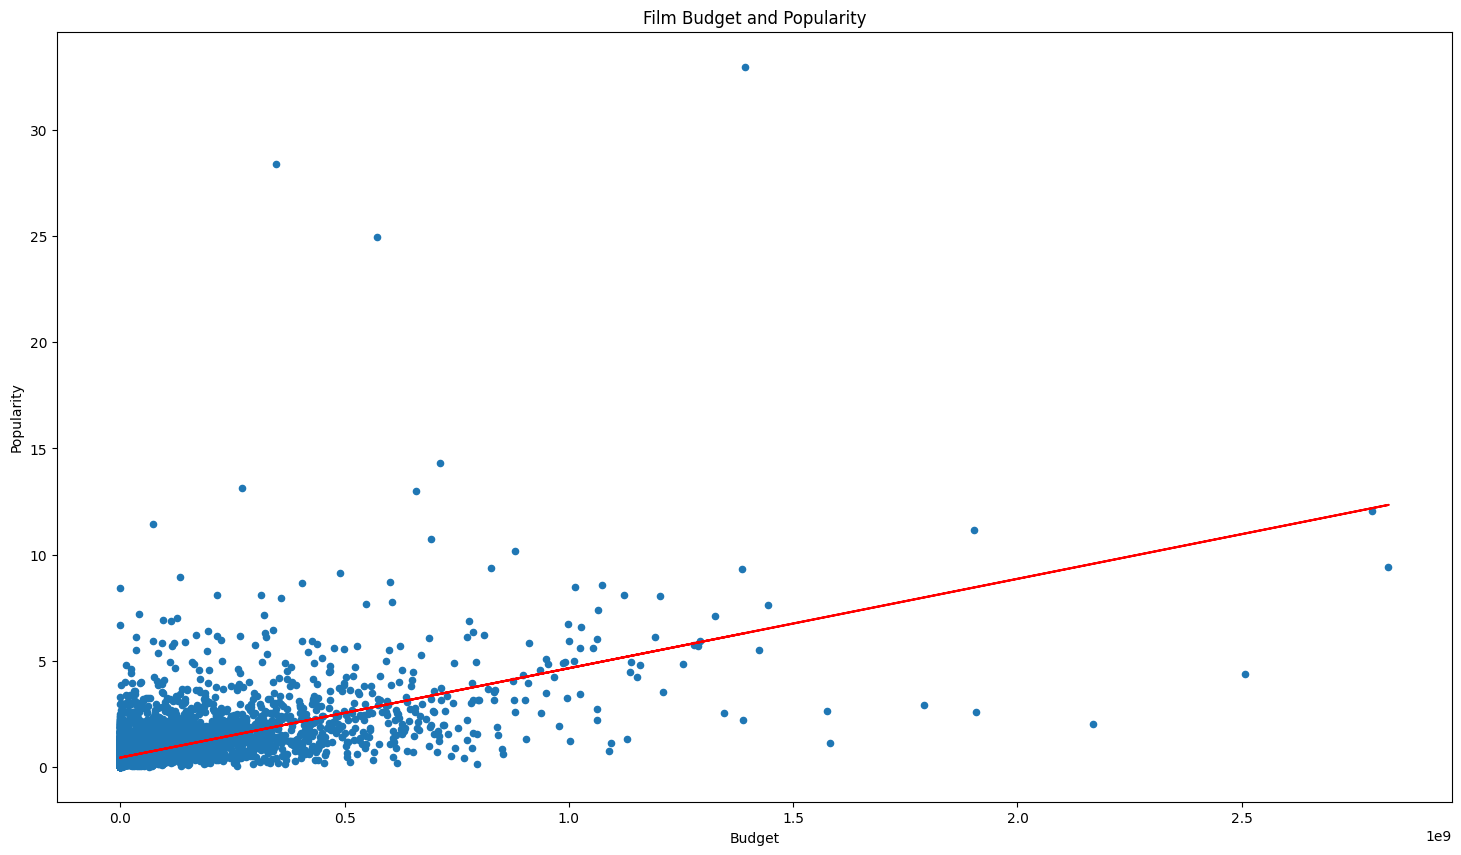

In [66]:
#Use the function created to plot a graph of revenvue vs popularity with a regression line
plot_scatter_with_trend(df, 'revenue_adj', 'popularity', 'Film Budget and Popularity', 'Budget', 'Popularity')

There are a few outliers in the graph above, with popularity greater than 15. So I will remove those values.

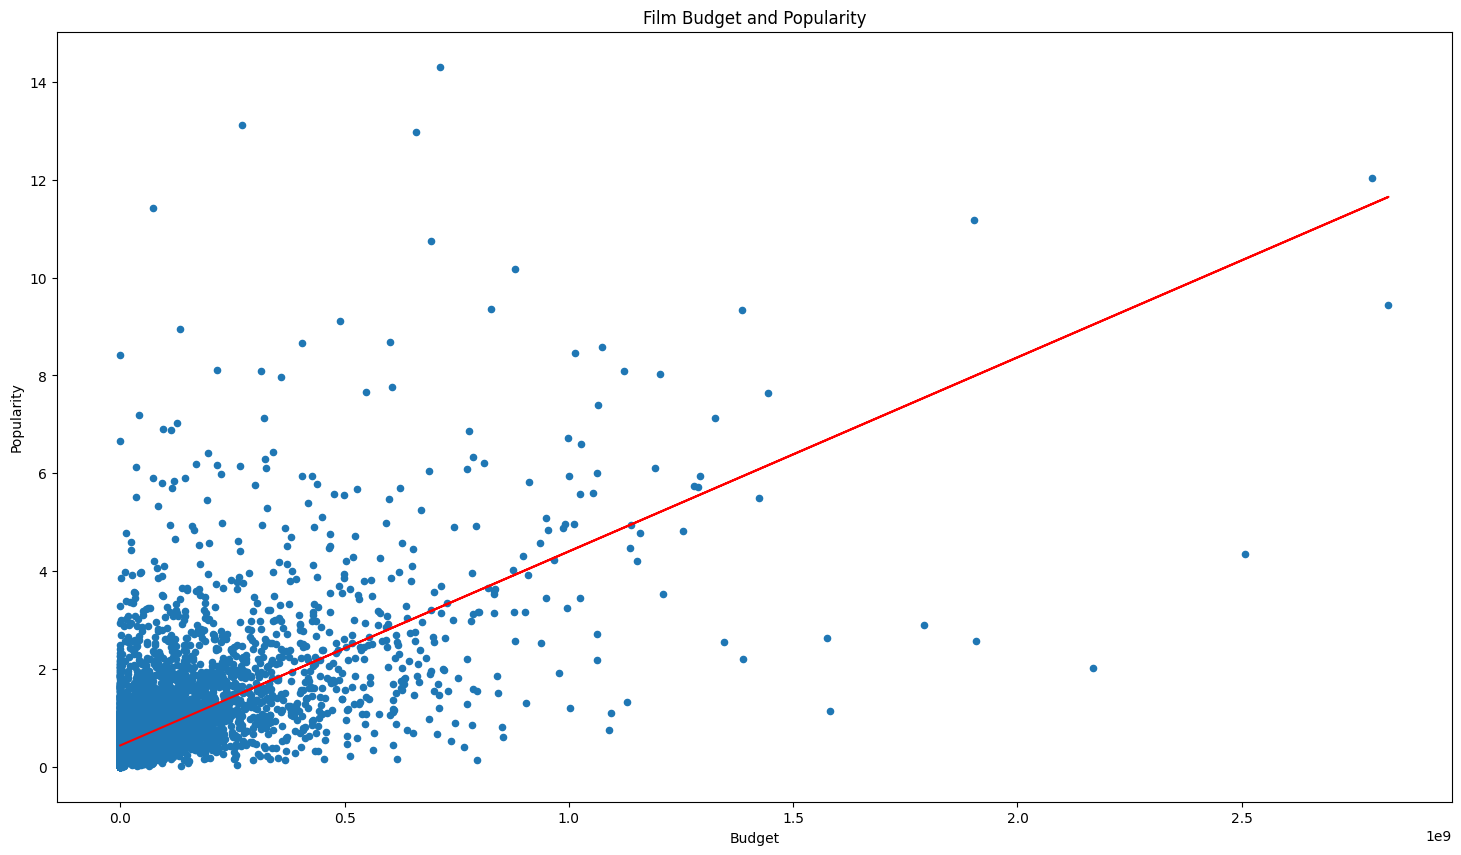

In [67]:
# Filter the DataFrame to exclude the outliers in 'popularity'
pop_filtered_df = df[(df['popularity'] <= 15)]

#Use the function created to plot a graph with outliers removed of revenvue vs popularity with a regression line
plot_scatter_with_trend(pop_filtered_df, 'revenue_adj', 'popularity', 'Film Budget and Popularity', 'Budget', 'Popularity')

The trend line shows that there is a positive trend between movie revenue and popularity. However, scatter about the line is very high, so the relationship between movie revenue and popularity is weak. We cannot say the higher the revenue, the greater the popularity.

### Research Question 2  
## What are the yearly trends?

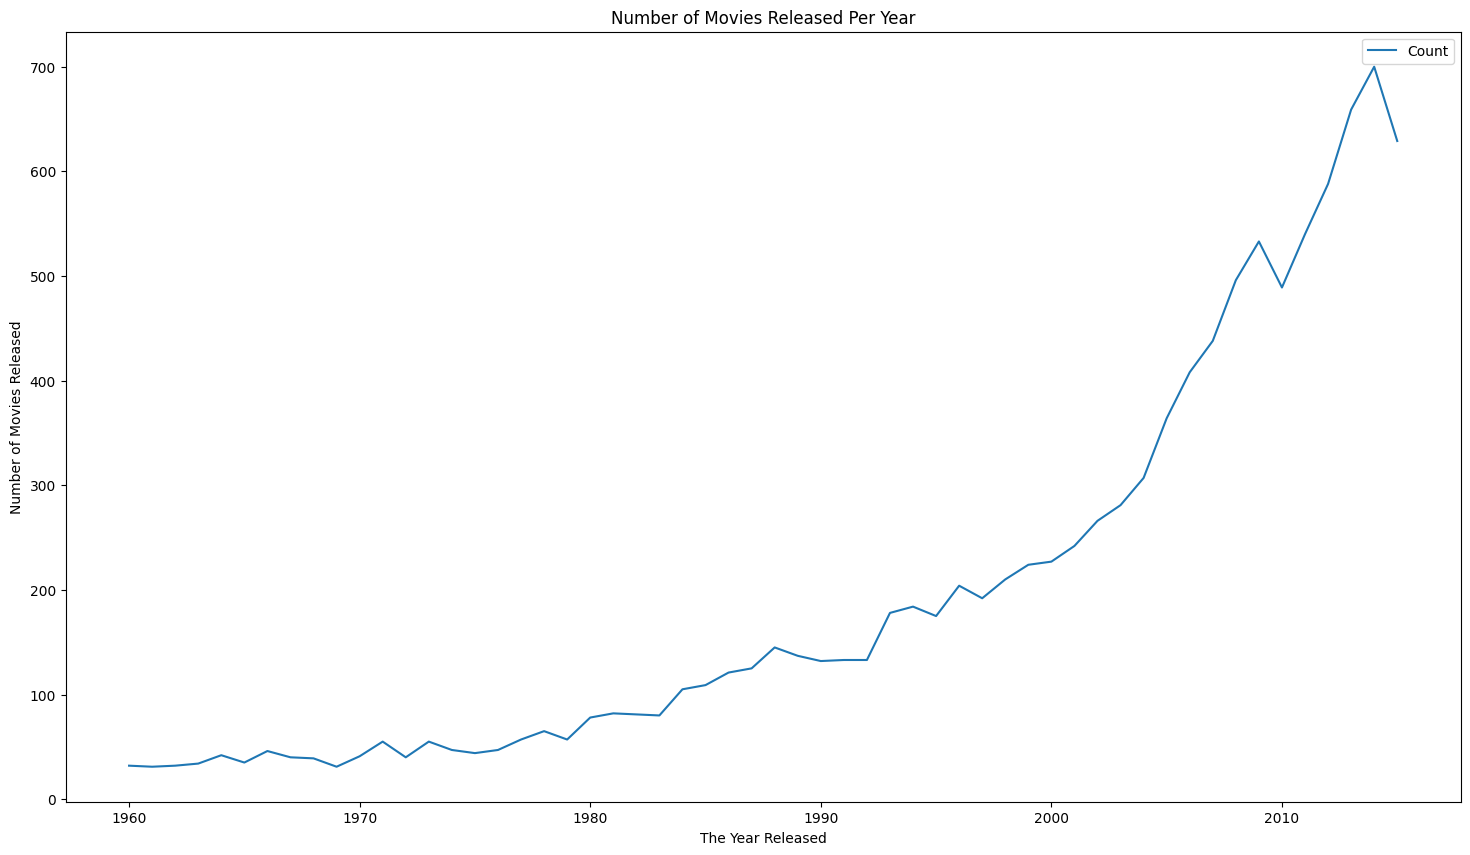

In [68]:
#Count of the movies released per year
movies_per_year = df.release_year.value_counts()

#Creating a df with column names and sorting the values
movies_per_year_dataframe = pd.DataFrame(movies_per_year).reset_index()
movies_per_year_dataframe.columns = ['Year','Count']
movies_per_year_dataframe = movies_per_year_dataframe.sort_values(by='Year')

#plotting the number of movies released per year
movies_per_year_dataframe.plot(x='Year', y='Count', kind='line', figsize=(18,10), title="Number of Movies Released Per Year", xlabel='The Year Released', ylabel='Number of Movies Released');

This graph shows that the number of movies released increases with time. 

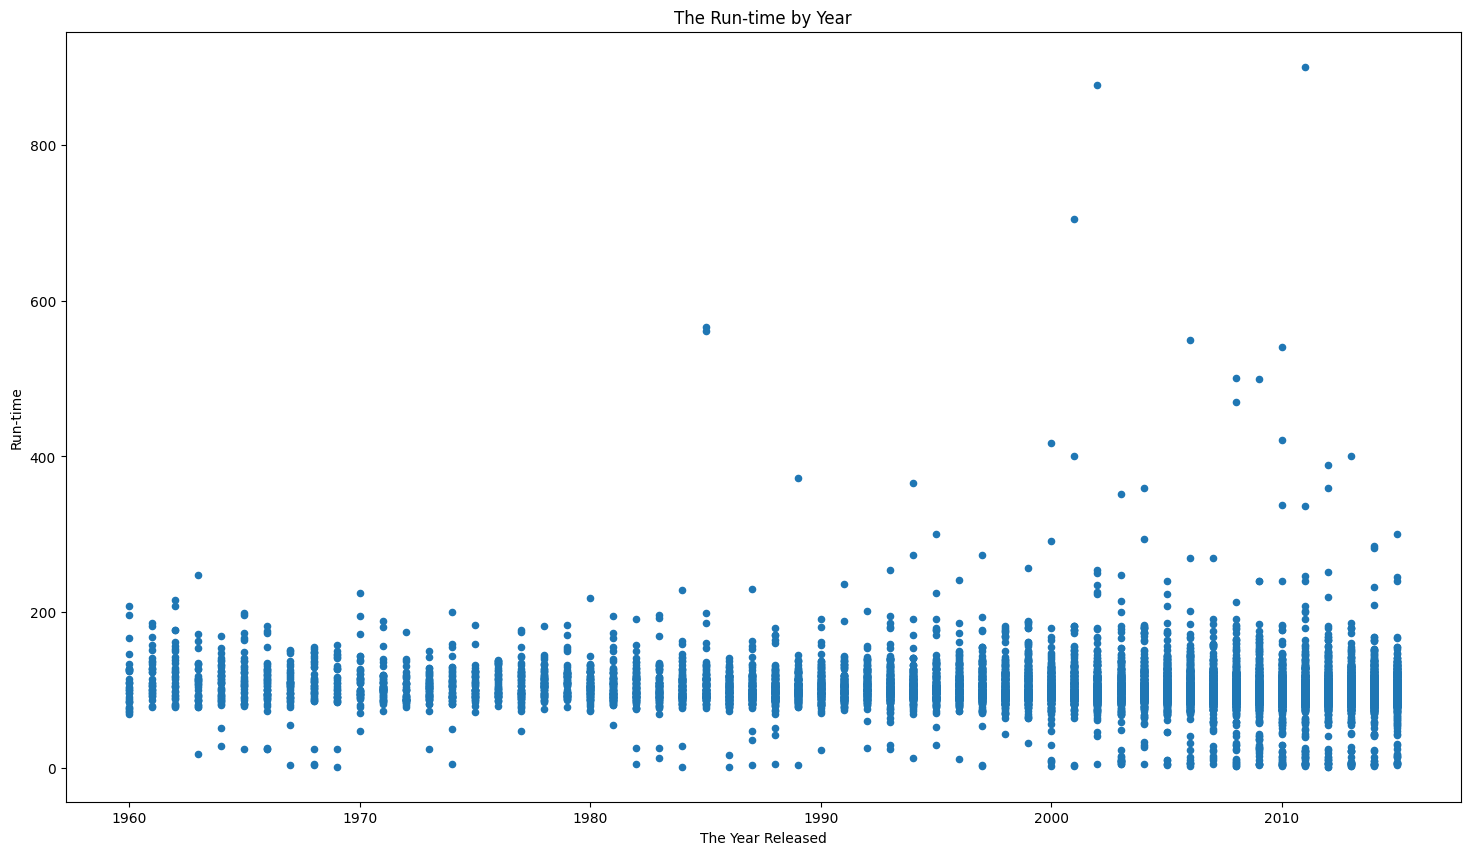

In [69]:
#filtering by a runtime of more than 0 mins
runtime_df = df[df['runtime'] > 0]
#plot the runitme by year released
runtime_df.plot(kind='scatter', x='release_year', y='runtime',figsize=(18,10), title='The Run-time by Year', xlabel='The Year Released', ylabel='Run-time');

It seems from the above graph that the run time of movies increases by year. However, I want to find the average movie run time by year. 

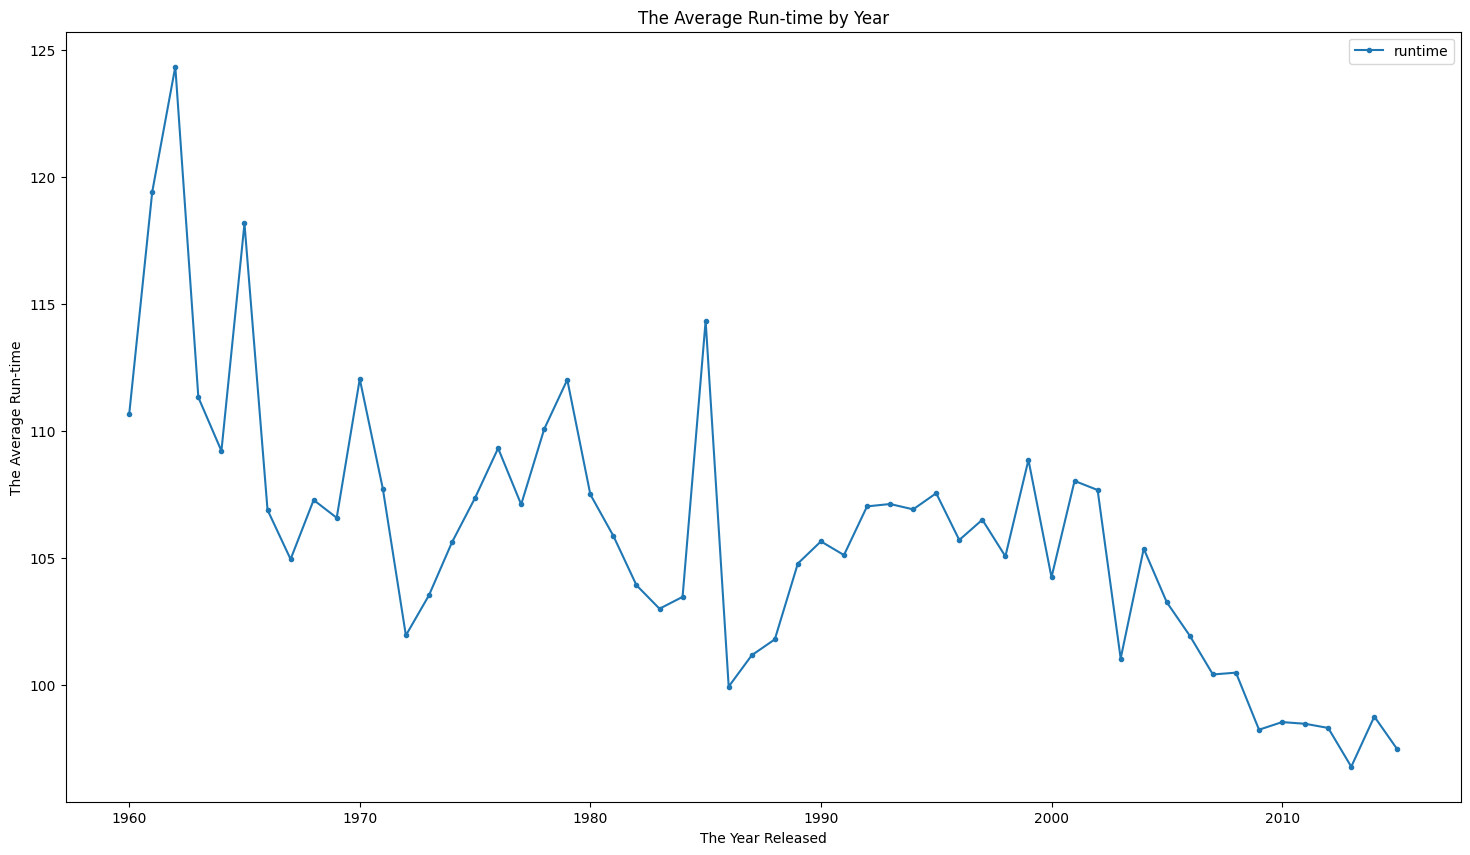

In [70]:
#Getting the mean of the runtime per year
year_group = runtime_df.groupby(by="release_year")['runtime'].mean().reset_index()
#Plot the release year by mean runtime
year_group.plot(kind='line', style='.-', x='release_year', y='runtime',figsize=(18,10),title='The Average Run-time by Year', xlabel='The Year Released', ylabel='The Average Run-time');

Interestingly this graph shows that the average runtime goes down by year. There may be many more shorter movies in recent times and from the previous graph, it looked as though the the run time was increasing by year, however, this graph shows otherwise. 

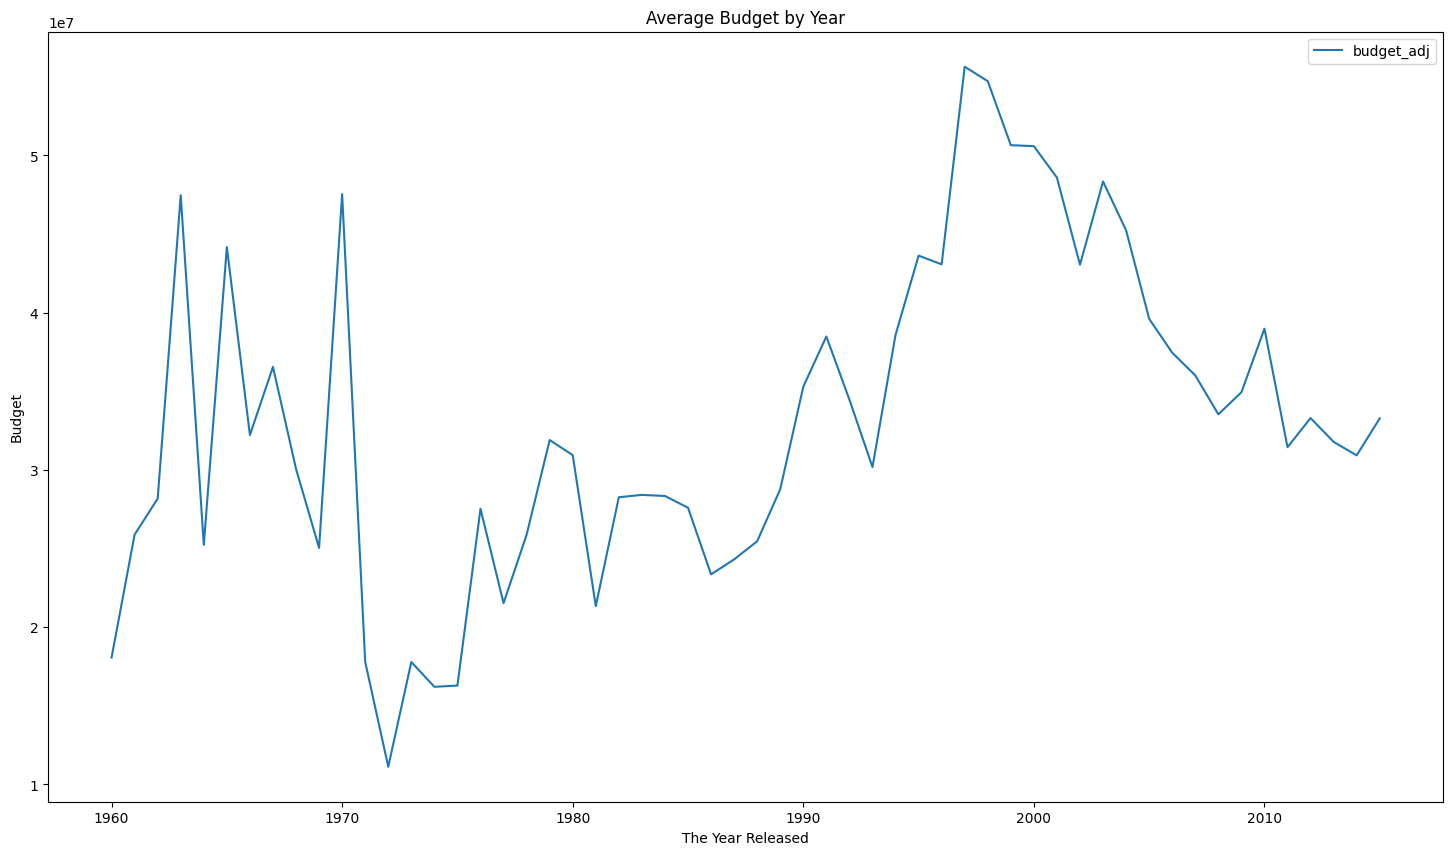

In [71]:
#remove movies with budget of 0
nozero_budget_df = df[df['budget_adj'] > 0]
#Getting the mean of the budget and grouping by year
year_budget = nozero_budget_df.groupby(by="release_year")['budget_adj'].mean().reset_index()
#plot the graph
year_budget.plot(kind='line', x='release_year', y='budget_adj',figsize=(18,10),title='Average Budget by Year', xlabel='The Year Released', ylabel='Budget');

The average budget by year shows an interesting trend. There may have been an event that occurred in the 1970s that meant that there was no money for film-makers. This could be something to further investigate. 

<a id='conclusions'></a>
## Conclusions

What kind of properties are associated with popularity?
In summary, the most popular genre per movie was adventure. However, I can not say that an adventure film will always be more popular than a comedy film. There are many factors that can impact this such as the actors and actresses involved or the time of year it's released.
There is not a strong relationship between the budget or revenue and the popularity of a film. The scatter about the regression line was high so I cannot say that the higher one variable is, the higher the other will be. There were a few outliers with a very high popularity rating compared to the other scores. I removed the outliers to see if there was a stronger relationship between the vairables once they were removed. The scatter was greater once the outliers were moved so further analysis is required and could include fitting a regression model and calculating the r-squared value. 

What are the yearly trends?
The yearly trends show that the number of films released by year increases. Another yearly trend is the average run-time. The run-time seems to decrease by year. The average budget by year shows an interesting trend. There may have been an event that occurred in the 1970s that meant that there was no money for film-makers. This could be something to further investigate.

Limitations:  
There are a few limitations in this project. The first limitation is that all the feilds are filled in by users of TMDB. This means there may be some bias in the data as the people that use this website are most probably people who enjoy watching films and at a certain age to understand databases. This means that the group does not include young children or possibly the older generation and does not include people who are not users of the website.   

A limitation of the data is the fact that many of the films have a budget of 0. This means that I had to remove many of the rows which makes the sample size smaller than the original. The smaller the sample size, the less representative of the population. 

Another limitation of the data is the website does not state which currency the budget and revenue are in. The original movie dataset is from [kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata/data) which doesn't state the currency. 


In [72]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] Writing 755701 bytes to Investigate_a_Dataset.html
